<a href="https://colab.research.google.com/github/shelvi31/Google-Tensorflow-Developer-Specialization-Course-/blob/main/CNN_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convulational Neural Network:**

 Earlier we worked with Dense Neural Networks(DNN)
 
CNN: one of the things that you would have seen when you looked at the images is that there's a lot of wasted space in each image. While there are only 784 pixels, it will be interesting to see if there was a way that we could condense the image down to the important features that distinguish what makes it a shoe, or a handbag, or a shirt. That's where convolutions come in. 

In [ ]:
#HOW CNN Converts Images :

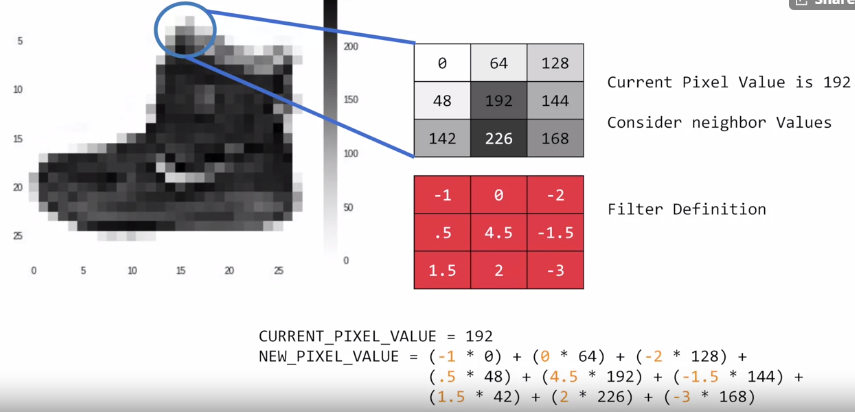

when CNN combined with something called pooling, they can become really powerful. But simply, pooling is a way of compressing an image. A quick and easy way to do this, is to go over the image of four pixels at a time,A quick and easy way to do this, is to go over the image of four pixels at a time, i.e, the current pixel and its neighbors underneath and to the right of it. Of these four, pick the biggest value and keep just that.

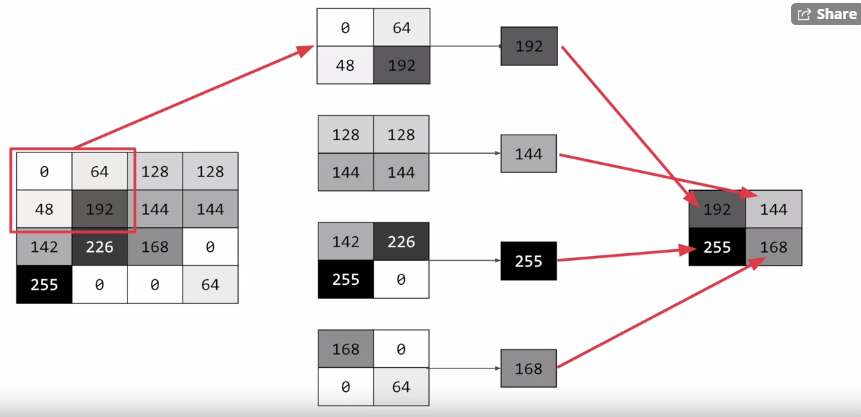

This will preserve the features that were highlighted by the convolution, while simultaneously quartering the size of the image. We have the horizontal and vertical axes.

## IMPLEMENTING CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

model_cnn = tf.keras.models.Sequential([
      #Specifying 1st convulation:asking keras to generate 64 filters for ys, these filters are 3*3 ,
      #Activation : Relu : that means negative values will be thrown away,
      # input shape: 28*28 as before(pixel size of each image), That extra 1 just means that we are tallying using a single byte for color depth. 
      #As we saw before our image is our gray scale, so we just use one byte.
      tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
      
      #taking 2,2 matrix fro pooling, maxpooling : because we are taking max value
      tf.keras.layers.MaxPooling2D(2,2),   

      #Adding other cnn and pooling layer so that the network can learn another set of convolutions on top of the existing one, 
      #and then again, pool to reduce the size. 
      tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")   #output has 10 classes
])
                          

model.summary(): 
This allows you to inspect the layers of the model, and see the journey of the image through the convolutions, and here is the output.

In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

 When you first look at this, it can be a little bit confusing and feel like a bug. After all, isn't the data 28 by 28, so y is the output, 26 by 26. The key to this is remembering that the filter is a three by three filter. Consider what happens when you start scanning through an image starting on the top left.  You can't calculate the filter for the pixel in the top left, because it doesn't have any neighbors above it or to its left. In a similar fashion, the next pixel to the right won't work either because it doesn't have any neighbors above it.

 so the output of the convolution will be two pixels smaller on x, and two pixels smaller on y.

 there are a number of convolutions per image that we specified, in this case 64. So, there are 64 new images of five-by-five that had been fed in. Flatten that out and you have 25 pixels times 64, which is 1600. So, you can see that the new flattened layer has 1,600 elements in it, as opposed to the 784 that you had previously.

# Improving Fashion Classifier MNSIT with Convolutions:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape(60000,28,28,1)
train_images = train_images/255.0

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0

model_cnn_fashion = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),   
      tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")   #output has 10 classes
])

model_cnn_fashion.compile(optimizer="adam",loss="sparse_categorical_crossentropy")
model_cnn_fashion.summary()
model_cnn_fashion.fit(train_images,train_labels,epochs=5)

test_loss = model_cnn_fashion.evaluate(test_images,test_labels)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [ ]:
#Result: 25% loss for test data , 18% for train

The first thing you'll notice is that the training is much slower. For every image, 64 convolutions are being tried, and then the image is compressed and then another 64 convolutions, and then it's compressed again, and then it's passed through the DNN, and that's for 60,000 images that this is happening on each epoch. 

## Visualizing Convolutions and Pooling

This is a really fun visualization of the journey of an image through the convolutions. 

labels for all 10 categories of clothes , ex: 09 for boot etc. printing labels for first 100 images

In [ ]:
test_labels[0:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

The Keras API gives us each convolution and each pooling and each dense, etc. as a layer. So with the layers API, I can take a look at each layer's outputs, so I'll create a list of each layer's output. I can then treat each item in the layer as an individual activation model if I want to see the results of just that layer. Now, by looping through the layers, I can display the journey of the image through the first convolution and then the first pooling and then the second convolution and then the second pooling. Note how the size of the image is changing by looking at the axes.

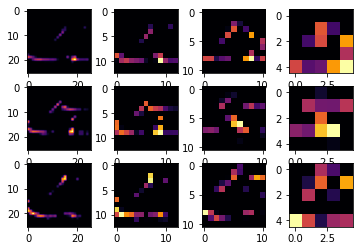

In [ ]:
import matplotlib.pyplot as plt

f,axarr = plt.subplots(3,4)

#0,23rd and 28th labels are all 9 : Shoe
first_image=0
second_image = 23
third_image=28
con_number=1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model_cnn_fashion.layers]
activation_model = tf.keras.models.Model(inputs =model_cnn_fashion.input,outputs =layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,con_number],cmap="inferno")
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,con_number],cmap="inferno")
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,con_number],cmap="inferno")
  axarr[2,x].grid(False)


If I set the convolution number to one, we can see that it almost immediately detects the laces area as a common feature between the shoes.

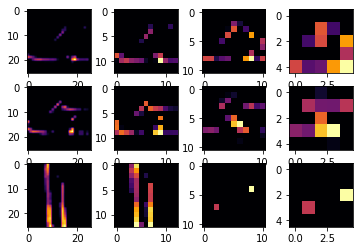

In [ ]:
import matplotlib.pyplot as plt

f,axarr = plt.subplots(3,4)

first_image= 0 
second_image = 23
third_image= 3
con_number=1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model_cnn_fashion.layers]
activation_model = tf.keras.models.Model(inputs =model_cnn_fashion.input,outputs =layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,con_number],cmap="inferno")
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,con_number],cmap="inferno")
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,con_number],cmap="inferno")
  axarr[2,x].grid(False)


Now, by looping through the layers, I can display the journey of the image through the first convolution and then the first pooling and then the second convolution and then the second pooling. Note how the size of the image is changing by looking at the axes. If I set the convolution number to one, we can see that it almost immediately detects the laces area as a common feature between the shoes. So, for example, if I change the third image to be one, which looks like a handbag, you'll see that it also has a bright line near the bottom that could look like the soul of the shoes, but by the time it gets through the convolutions, that's lost, and that area for the laces doesn't even show up at all. 